In [1]:
import pandas as pd

# Replace 'file_path.parquet' with the actual path to your .parquet file
file_path = r'C:\Users\Akshat Agarwal\Desktop\Data_Science\Kaggle\ESA_Try\train.parquet'
df = pd.read_parquet(file_path)

print(df)

                id  channel_1  channel_10  channel_11  channel_12  channel_13  \
0                0    0.13791         0.0         0.0    0.317175    0.371764   
1                1    0.13791         0.0         0.0    0.317175    0.371764   
2                2    0.13791         0.0         0.0    0.317175    0.371764   
3                3    0.13791         0.0         0.0    0.317175    0.371764   
4                4    0.13791         0.0         0.0    0.317175    0.371764   
...            ...        ...         ...         ...         ...         ...   
14728316  14728316    0.13791         0.0         0.0    0.218915    0.270384   
14728317  14728317    0.13791         0.0         0.0    0.218915    0.268824   
14728318  14728318    0.13791         0.0         0.0    0.218915    0.268824   
14728319  14728319    0.13791         0.0         0.0    0.218915    0.268824   
14728320  14728320    0.13791         0.0         0.0    0.215795    0.270384   

          channel_14  chann

In [2]:
column_headers = df.columns.tolist()
print(column_headers)


['id', 'channel_1', 'channel_10', 'channel_11', 'channel_12', 'channel_13', 'channel_14', 'channel_15', 'channel_16', 'channel_17', 'channel_18', 'channel_19', 'channel_2', 'channel_20', 'channel_21', 'channel_22', 'channel_23', 'channel_24', 'channel_25', 'channel_26', 'channel_27', 'channel_28', 'channel_29', 'channel_3', 'channel_30', 'channel_31', 'channel_32', 'channel_33', 'channel_34', 'channel_35', 'channel_36', 'channel_37', 'channel_38', 'channel_39', 'channel_4', 'channel_40', 'channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46', 'channel_47', 'channel_48', 'channel_49', 'channel_5', 'channel_50', 'channel_51', 'channel_52', 'channel_53', 'channel_54', 'channel_55', 'channel_56', 'channel_57', 'channel_58', 'channel_59', 'channel_6', 'channel_60', 'channel_61', 'channel_62', 'channel_63', 'channel_64', 'channel_65', 'channel_66', 'channel_67', 'channel_68', 'channel_69', 'channel_7', 'channel_70', 'channel_71', 'channel_72', 'channel_73', 'chann

In [3]:
anomaly_counts = df['is_anomaly'].value_counts(dropna=False)

# Calculate percentages
anomaly_percentages = df['is_anomaly'].value_counts(normalize=True, dropna=False) * 100

anomaly_summary = pd.DataFrame({
    'Count': anomaly_counts,
    'Percentage': anomaly_percentages.round(2)
})


print(anomaly_summary)

               Count  Percentage
is_anomaly                      
0           13184217       89.52
1            1544104       10.48


c:\Users\Akshat Agarwal\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


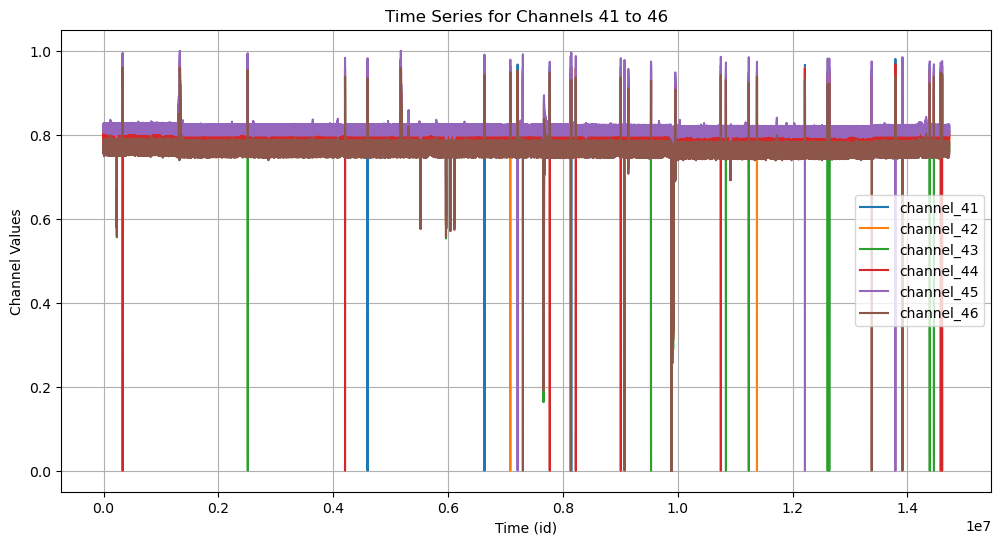

In [4]:
import matplotlib.pyplot as plt

# Select the columns for channels 41 to 46
channels_to_plot = ['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']

# Plot the time series
plt.figure(figsize=(12, 6))
for channel in channels_to_plot:
    plt.plot(df['id'], df[channel], label=channel)

plt.xlabel('Time (id)')
plt.ylabel('Channel Values')
plt.title('Time Series for Channels 41 to 46')
plt.legend()
plt.grid()
plt.show()

In [5]:
subset_df = df[['id', 'is_anomaly', 'channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']]
print(subset_df.head())

   id  is_anomaly  channel_41  channel_42  channel_43  channel_44  channel_45  \
0   0           0    0.812578    0.786344    0.771900    0.799178    0.816855   
1   1           0    0.812578    0.786344    0.771900    0.799178    0.816855   
2   2           0    0.821213    0.789557    0.770317    0.809411    0.816006   
3   3           0    0.819642    0.786344    0.770317    0.807050    0.816855   
4   4           0    0.821996    0.788753    0.770317    0.807837    0.818551   

   channel_46  
0    0.765296  
1    0.765296  
2    0.765296  
3    0.766985  
4    0.761073  


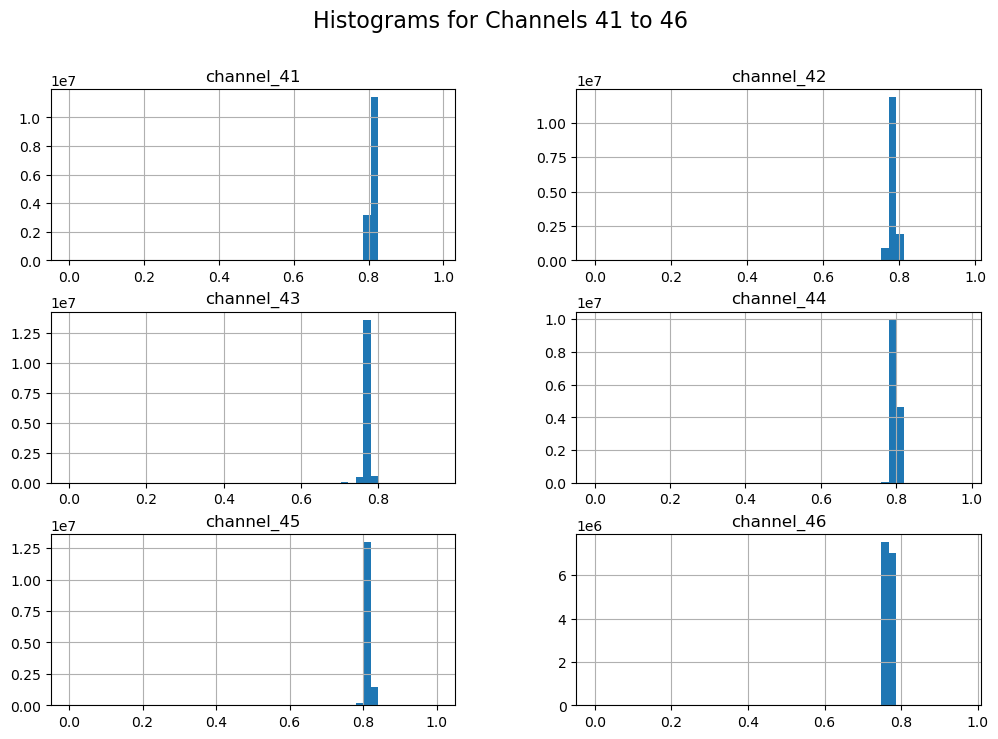

In [6]:
subset_df[['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']].hist(figsize=(12, 8), bins=50)
plt.suptitle('Histograms for Channels 41 to 46', fontsize=16)
plt.show()

In [7]:
from scipy import stats

# Select the columns for analysis
channels = ['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']

# Initialize a dictionary to store the results
statistics = {}

# Calculate statistics for each channel
for channel in channels:
    data = subset_df[channel]
    statistics[channel] = {
        'Mean': data.mean(),
        'Median': data.median(),
        'Mode': stats.mode(data, keepdims=True).mode[0],
        'Min_value': data.min(),
        'Max_value': data.max(),
        '25th Percentile': data.quantile(0.25),
        '50th Percentile (Median)': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Range': data.max() - data.min(),
        'Standard Deviation': data.std()
    }

# Convert the statistics dictionary to a DataFrame for better visualization
statistics_df = pd.DataFrame(statistics).T
print(statistics_df)

                Mean    Median      Mode  Min_value  Max_value  \
channel_41  0.808208  0.809439  0.806299        0.0   0.982110   
channel_42  0.782121  0.783130  0.778311        0.0   0.966273   
channel_43  0.768569  0.770317  0.770317        0.0   0.950728   
channel_44  0.794010  0.796030  0.792881        0.0   0.975506   
channel_45  0.810380  0.811767  0.805832        0.0   1.000000   
channel_46  0.765622  0.766985  0.762762        0.0   0.959530   

            25th Percentile  50th Percentile (Median)  75th Percentile  \
channel_41         0.805514                  0.809439         0.814149   
channel_42         0.778311                  0.783130         0.789557   
channel_43         0.766361                  0.770317         0.774274   
channel_44         0.791306                  0.796030         0.800752   
channel_45         0.806680                  0.811767         0.816855   
channel_46         0.761073                  0.766985         0.772895   

               Ran

Starting with classification

In [81]:
# Importing the required libraries
import numpy as np
from skforecast.datasets import fetch_dataset
from sklearn.preprocessing import PowerTransformer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.creation import CyclicalFeatures
from feature_engine.timeseries.forecasting import WindowFeatures

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from skforecast.plot import plot_residuals
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')

import xgboost
import lightgbm
import catboost
import sklearn
import shap
import seaborn as sns
import lightgbm as lgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_recall_curve
from lightgbm import early_stopping
from lightgbm import log_evaluation
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer,
    PolynomialFeatures,
)
from sklearn.feature_selection import RFECV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

import skforecast
from skforecast.recursive import ForecasterEquivalentDate, ForecasterRecursive
from skforecast.model_selection import (
    TimeSeriesFold,
    OneStepAheadFold,
    bayesian_search_forecaster,
    backtesting_forecaster,
)
from skforecast.preprocessing import RollingFeatures
from skforecast.feature_selection import select_features
# from skforecast.metrics import calculate_coverage

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m' 
print(f"{color}Version skforecast: {skforecast.__version__}")
print(f"{color}Version scikit-learn: {sklearn.__version__}")
print(f"{color}Version lightgbm: {lightgbm.__version__}")
print(f"{color}Version xgboost: {xgboost.__version__}")
print(f"{color}Version catboost: {catboost.__version__}")
print(f"{color}Version pandas: {pd.__version__}")
print(f"{color}Version numpy: {np.__version__}")

Version skforecast: 0.14.0
Version scikit-learn: 1.3.2
Version lightgbm: 4.3.0
Version xgboost: 2.0.3
Version catboost: 1.2.5
Version pandas: 2.1.3
Version numpy: 1.23.0


In [9]:
# Setting the index
subset_df = subset_df.set_index('id')

# Split into train, test and validate


In [26]:
# Calculate the split indices
train_size = int(len(subset_df) * 0.6)
validate_size = int(len(subset_df) * 0.2)

# Perform the splits
train_data = subset_df.iloc[:train_size]
validate_data = subset_df.iloc[train_size:train_size + validate_size]
test_data = subset_df.iloc[train_size + validate_size:]

# Print the sizes of the splits
print(f"Train data size: {len(train_data)}")
print(f"Validate data size: {len(validate_data)}")
print(f"Test data size: {len(test_data)}")

Train data size: 8836992
Validate data size: 2945664
Test data size: 2945665


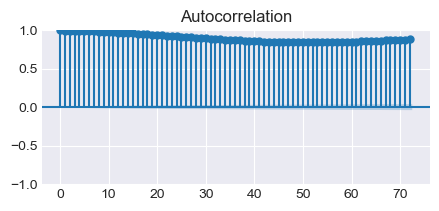

In [11]:
# Autocorrelation plot
# ==============================================================================
# Get the first 10% of the data
first_2_percent = subset_df.iloc[:int(0.02 * len(subset_df))]

# Plot ACF for 'channel_41' on the subset
fig, ax = plt.subplots(figsize=(5, 2))
plot_acf(first_2_percent['channel_41'], ax=ax, lags=72)
plt.show()

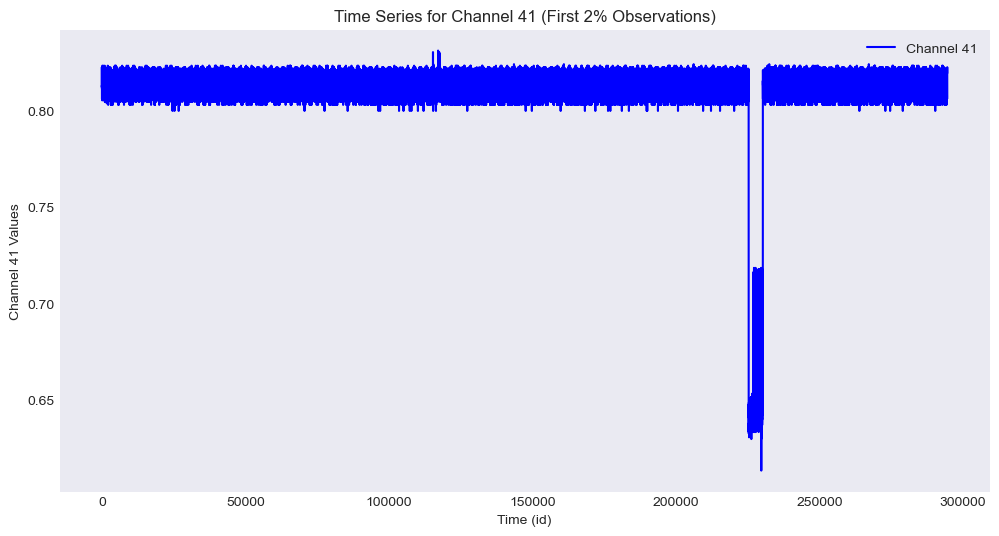

In [12]:
# Plot the time series for the first 2% of observations for channel_41
plt.figure(figsize=(12, 6))
plt.plot(first_2_percent.index, first_2_percent['channel_41'], label='Channel 41', color='blue')
plt.xlabel('Time (id)')
plt.ylabel('Channel 41 Values')
plt.title('Time Series for Channel 41 (First 2% Observations)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
subset_df


,is_anomaly,channel_41,channel_42,channel_43,channel_44,channel_45,channel_46
id,,,,,,,
0,0,0.812578,0.786344,0.771900,0.799178,0.816855,0.765296
1,0,0.812578,0.786344,0.771900,0.799178,0.816855,0.765296
2,0,0.821213,0.789557,0.770317,0.809411,0.816006,0.765296
3,0,0.819642,0.786344,0.770317,0.807050,0.816855,0.766985
4,0,0.821996,0.788753,0.770317,0.807837,0.818551,0.761073
...,...,...,...,...,...,...,...
14728316,0,0.806299,0.799999,0.767944,0.792093,0.821094,0.752628
14728317,0,0.806299,0.790360,0.765569,0.792881,0.821941,0.763607
14728318,0,0.806299,0.795180,0.765569,0.792881,0.822790,0.762762


In [19]:
# Save the top 100 observations to a CSV file
subset_df.head(100).to_csv('top_100_observations.csv', index=True)

In [18]:
df_exog = subset_df[['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']]
print(df_exog.head())

    channel_41  channel_42  channel_43  channel_44  channel_45  channel_46
id                                                                        
0     0.812578    0.786344    0.771900    0.799178    0.816855    0.765296
1     0.812578    0.786344    0.771900    0.799178    0.816855    0.765296
2     0.821213    0.789557    0.770317    0.809411    0.816006    0.765296
3     0.819642    0.786344    0.770317    0.807050    0.816855    0.766985
4     0.821996    0.788753    0.770317    0.807837    0.818551    0.761073


In [24]:
x = subset_df[['is_anomaly']]
y = subset_df[['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']]
print(x.head())
print(y.head())



    is_anomaly
id            
0            0
1            0
2            0
3            0
4            0
    channel_41  channel_42  channel_43  channel_44  channel_45  channel_46
id                                                                        
0     0.812578    0.786344    0.771900    0.799178    0.816855    0.765296
1     0.812578    0.786344    0.771900    0.799178    0.816855    0.765296
2     0.821213    0.789557    0.770317    0.809411    0.816006    0.765296
3     0.819642    0.786344    0.770317    0.807050    0.816855    0.766985
4     0.821996    0.788753    0.770317    0.807837    0.818551    0.761073


In [25]:
class_weights = {0: 1, 1: 10}  # Adjust based on imbalance ratio

In [33]:
y_train = train_data[['is_anomaly']]
y_val = validate_data[['is_anomaly']]
y_test = test_data[['is_anomaly']]
x_train = train_data[['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']]
x_val = validate_data[['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']] 
x_test = test_data[['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']]

print(x_train.head())
print(x_val.head())
print(x_test.head())
print(y_train.head())
print(y_val.head())
print(y_test.head())

    channel_41  channel_42  channel_43  channel_44  channel_45  channel_46
id                                                                        
0     0.812578    0.786344    0.771900    0.799178    0.816855    0.765296
1     0.812578    0.786344    0.771900    0.799178    0.816855    0.765296
2     0.821213    0.789557    0.770317    0.809411    0.816006    0.765296
3     0.819642    0.786344    0.770317    0.807050    0.816855    0.766985
4     0.821996    0.788753    0.770317    0.807837    0.818551    0.761073
         channel_41  channel_42  channel_43  channel_44  channel_45  \
id                                                                    
8836992    0.812578    0.785541    0.765569    0.799966    0.814311   
8836993    0.806299    0.787147    0.765569    0.801540    0.816006   
8836994    0.811009    0.783935    0.766361    0.799178    0.814311   
8836995    0.814932    0.782327    0.764778    0.800752    0.813463   
8836996    0.815718    0.780721    0.765569    0.

In [31]:
model = XGBClassifier(
    scale_pos_weight=10,  # Important for imbalanced data
    objective='binary:logistic',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='aucpr'  # Better for imbalanced data than 'auc'
)

In [34]:
model.fit(
    x_train, 
    y_train,
    eval_set=[(x_val, y_val)],
    early_stopping_rounds=20,
    verbose=True
)

c:\Users\Akshat Agarwal\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-aucpr:0.29425
[1]	validation_0-aucpr:0.30317
[2]	validation_0-aucpr:0.41667
[3]	validation_0-aucpr:0.42401
[4]	validation_0-aucpr:0.42807
[5]	validation_0-aucpr:0.42859
[6]	validation_0-aucpr:0.42865
[7]	validation_0-aucpr:0.42956
[8]	validation_0-aucpr:0.42931
[9]	validation_0-aucpr:0.42951
[10]	validation_0-aucpr:0.43056
[11]	validation_0-aucpr:0.43095
[12]	validation_0-aucpr:0.43123
[13]	validation_0-aucpr:0.43128
[14]	validation_0-aucpr:0.43180
[15]	validation_0-aucpr:0.43205
[16]	validation_0-aucpr:0.43251
[17]	validation_0-aucpr:0.43217
[18]	validation_0-aucpr:0.43236
[19]	validation_0-aucpr:0.43263
[20]	validation_0-aucpr:0.43252
[21]	validation_0-aucpr:0.43286
[22]	validation_0-aucpr:0.43288
[23]	validation_0-aucpr:0.43313
[24]	validation_0-aucpr:0.43332
[25]	validation_0-aucpr:0.43309
[26]	validation_0-aucpr:0.43308
[27]	validation_0-aucpr:0.43319
[28]	validation_0-aucpr:0.43320
[29]	validation_0-aucpr:0.43319
[30]	validation_0-aucpr:0.43301
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [36]:
# Make predictions on validation set
y_val_pred = model.predict(x_val)
y_val_proba = model.predict_proba(x_val)[:, 1]  # Probabilities for threshold tuning

print("\nValidation Set Performance:")
print(classification_report(y_val, y_val_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.94      0.37      0.53   2586995
           1       0.15      0.82      0.26    358669

    accuracy                           0.43   2945664
   macro avg       0.55      0.60      0.40   2945664
weighted avg       0.84      0.43      0.50   2945664



In [38]:
# Find optimal threshold based on validation set
precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

# Choose threshold that maximizes F1 score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.4f}")

# Apply optimal threshold to validation predictions
y_val_pred_optimal = (y_val_proba >= optimal_threshold).astype(int)

print("\nValidation Set Performance (Optimal Threshold):")
print(classification_report(y_val, y_val_pred_optimal))

Optimal threshold: 0.9190

Validation Set Performance (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95   2586995
           1       0.96      0.25      0.40    358669

    accuracy                           0.91   2945664
   macro avg       0.93      0.62      0.67   2945664
weighted avg       0.91      0.91      0.88   2945664



In [40]:
# Make predictions on test set (using optimal threshold if tuned)
y_test_proba = model.predict_proba(x_test)[:, 1]
y_test_pred = (y_test_proba >= optimal_threshold).astype(int)

print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred))

# Feature importance
importance = pd.DataFrame({
    'feature': x_test.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)


Test Set Performance:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94   2635490
           1       0.20      0.00      0.01    310175

    accuracy                           0.89   2945665
   macro avg       0.55      0.50      0.48   2945665
weighted avg       0.82      0.89      0.85   2945665


Feature Importance:
      feature  importance
0  channel_41    0.504712
2  channel_43    0.221701
4  channel_45    0.218879
1  channel_42    0.032226
3  channel_44    0.020279
5  channel_46    0.002202


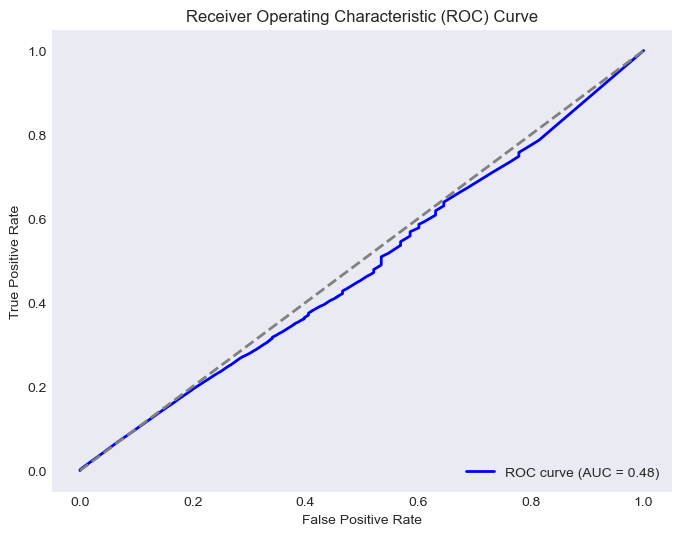

In [41]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Using LightGBM

In [ ]:

# Check and convert if needed
if isinstance(x_train, np.ndarray):
    x_train = pd.DataFrame(x_train)  # add column names here if you have them
if isinstance(x_val, np.ndarray):
    x_val = pd.DataFrame(x_val)
if isinstance(x_test, np.ndarray):
    X_test = pd.DataFrame(x_test)

# Now save original copies
x_train_orig = x_train.copy()
x_val_orig = x_val.copy()
x_test_orig = x_test.copy()

# Fit and transform
pt = PowerTransformer(method='yeo-johnson')
x_train_transformed = pt.fit_transform(x_train_orig)
x_val_transformed = pt.transform(x_val_orig)
x_test_transformed = pt.transform(x_test_orig)

# Convert back to DataFrames
x_train = pd.DataFrame(x_train_transformed, columns=x_train_orig.columns, index=x_train_orig.index)
x_val = pd.DataFrame(x_val_transformed, columns=x_val_orig.columns, index=x_val_orig.index)
X_test = pd.DataFrame(x_test_transformed, columns=x_test_orig.columns, index=x_test_orig.index)



c:\Users\Akshat Agarwal\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but PowerTransformer was fitted without feature names



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Extract and process the 'channel_41' column
channel_41_data = pd.to_numeric(x_train_df['channel_41'], errors='coerce').dropna()
sns.histplot(channel_41_data, bins=100, kde=True)
plt.title('Distribution of One channel')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
train_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_val, label=y_val)

# Calculate class weight for imbalance
pos_weight = (len(y_train) - y_train['is_anomaly'].sum()) / y_train['is_anomaly'].sum()


In [ ]:
# LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': True,  
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

In [ ]:


model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'valid'],
    num_boost_round=1000,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	train's binary_logloss: 0.322156	valid's binary_logloss: 0.363548


In [52]:
# Predict probabilities on validation & test sets
y_valid_prob = model.predict(x_val)
y_test_prob = model.predict(x_test)

In [ ]:
# ---- Event-wise F0.5 Evaluation ----
def find_events(sequence):
    events = []
    in_event = False
    for i, val in enumerate(sequence):
        if val == 1 and not in_event:
            start = i
            in_event = True
        elif val == 0 and in_event:
            end = i - 1
            events.append((start, end))
            in_event = False
    if in_event:
        events.append((start, len(sequence)-1))
    return events

def compute_event_wise_Fbeta(y_true, y_pred, beta=0.5):
    true_events = find_events(y_true)
    pred_events = find_events(y_pred)

    true_positives = sum(
        any(p_start <= t_end and p_end >= t_start for p_start, p_end in pred_events)
        for t_start, t_end in true_events
    )

    precision = true_positives / len(pred_events) if pred_events else 0
    recall = true_positives / len(true_events) if true_events else 0

    beta_sq = beta ** 2
    f_beta = (1 + beta_sq) * precision * recall / (beta_sq * precision + recall) if (precision + recall) > 0 else 0
    return f_beta, precision, recall



In [64]:
# Step 1: Get candidate thresholds from validation set
precision, recall, thresholds = precision_recall_curve(y_val, y_valid_prob)

# Since precision_recall_curve returns len(thresholds) == len(precision)-1,
# we can loop over the threshold candidates.
best_f_beta = -1
best_threshold = None

for threshold in thresholds:
    y_val_pred = (y_valid_prob >= threshold).astype(int)
    f_beta, event_precision, event_recall = compute_event_wise_Fbeta(y_val.values, y_val_pred, beta=0.5)

    if f_beta > best_f_beta:
        best_f_beta = f_beta
        best_threshold = threshold

print(f"Optimal Threshold (Event-wise F0.5) from Validation Set: {best_threshold:.4f}")
print(f"Validation Event-wise F0.5 Score: {best_f_beta:.4f}\n")

# Step 2: Apply Best Threshold on Test Set
y_test_pred = (y_test_prob >= best_threshold).astype(int)

# Evaluate Event-wise Fβ on Test Set
f_beta_test, event_precision_test, event_recall_test = compute_event_wise_Fbeta(
    y_test.values, y_test_pred, beta=0.5
)

print(f"Test Set Event-wise F0.5 Score: {f_beta_test:.4f}")
print(f"Event-wise Precision: {event_precision_test:.4f}")
print(f"Event-wise Recall: {event_recall_test:.4f}")

Optimal Threshold (Event-wise F0.5) from Validation Set: 0.1183
Validation Event-wise F0.5 Score: 4.4595

Test Set Event-wise F0.5 Score: 4.5238
Event-wise Precision: 38.0000
Event-wise Recall: 1.0000


In [75]:
sum(y_test_pred)


2945665

In [76]:
len(y_test_pred)

2945665

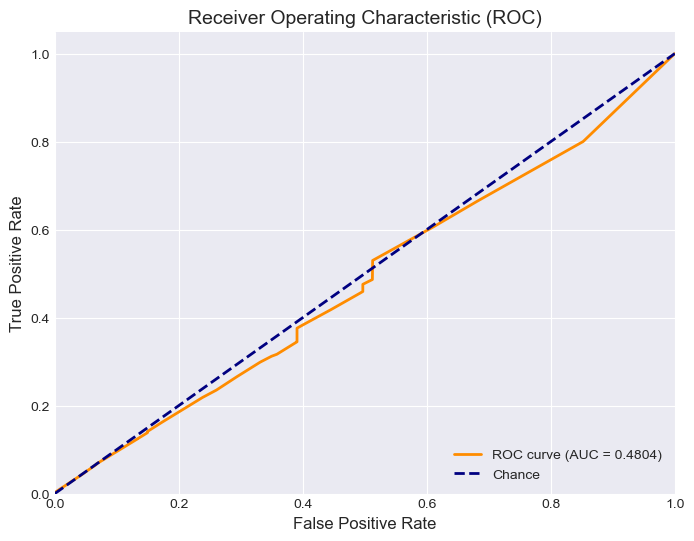

In [77]:
# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.4f})')

# Random chance line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

c:\Users\Akshat Agarwal\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



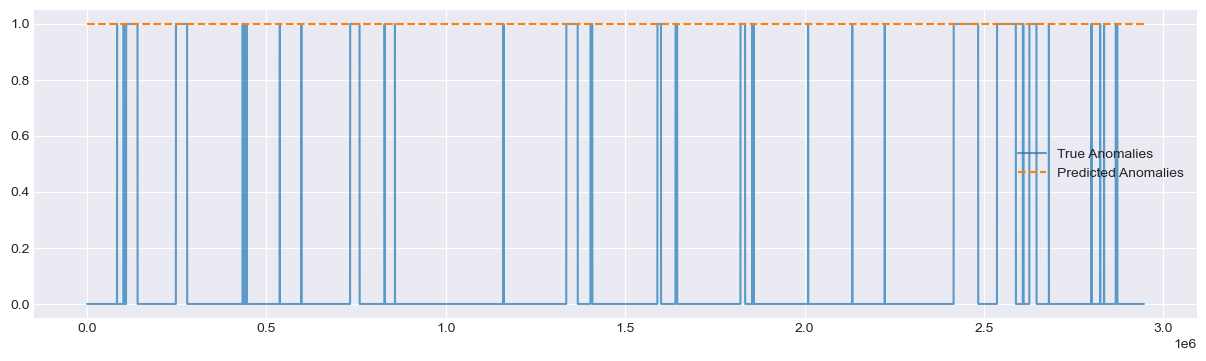

In [69]:
plt.figure(figsize=(15,4))
plt.plot(y_test.values, label='True Anomalies', alpha=0.7)
plt.plot(y_test_pred, label='Predicted Anomalies', linestyle='--')
plt.legend()
plt.show()

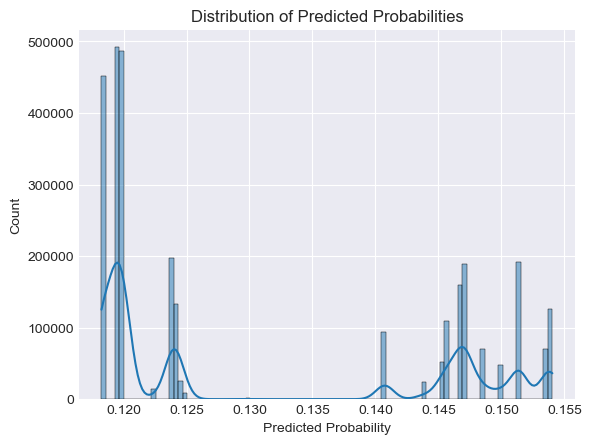

In [79]:
import seaborn as sns

sns.histplot(y_test_prob, bins=100, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.show()